In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.optimize as opt  # root-finding algorithm
import ipywidgets as widgets  # interactive display


In [2]:
def plot_fI(x, f):
    plt.figure(figsize=(6, 4))  # plot the figure
    plt.plot(x, f, 'k')
    plt.xlabel('x (a.u.)', fontsize=14)
    plt.ylabel('F(x)', fontsize=14)
    plt.show()


def plot_dr_r(r, drdt, x_fps=None):
    plt.figure()
    plt.plot(r, drdt, 'k')
    plt.plot(r, 0. * r, 'k--')
    if x_fps is not None:
        plt.plot(x_fps, np.zeros_like(x_fps), "ko", ms=12)
    plt.xlabel(r'$r$')
    plt.ylabel(r'$\frac{dr}{dt}$', fontsize=20)
    plt.ylim(-0.1, 0.1)
    plt.show()


def plot_dFdt(x, dFdt):
    plt.figure()
    plt.plot(x, dFdt, 'r')
    plt.xlabel('x (a.u.)', fontsize=14)
    plt.ylabel('dF(x)', fontsize=14)
    plt.show()

In [3]:
def default_pars_single(**kwargs):
    pars = {}

    # Excitatory parameters
    pars['tau'] = 1.     # Timescale of the E population [ms]
    pars['a'] = 1.2      # Gain of the E population
    pars['theta'] = 2.8  # Threshold of the E population

    # Connection strength
    pars['w'] = 0.  # E to E, we first set it to 0

    # External input
    pars['I_ext'] = 0.

    # simulation parameters
    pars['T'] = 20.       # Total duration of simulation [ms]
    pars['dt'] = .1       # Simulation time step [ms]
    pars['r_init'] = 0.2  # Initial value of E

    # External parameters if any
    pars.update(kwargs)

    # Vector of discretized time points [ms]
    pars['range_t'] = np.arange(0, pars['T'], pars['dt'])

    return pars

pars = default_pars_single()
print(pars)

{'tau': 1.0, 'a': 1.2, 'theta': 2.8, 'w': 0.0, 'I_ext': 0.0, 'T': 20.0, 'dt': 0.1, 'r_init': 0.2, 'range_t': array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
       12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1,
       13.2, 13

In [4]:
def F(Iext, a, theta):
    first_term = 1.0 / (1 + np.exp(-a * (Iext - theta)))
    second_term = 1.0 / (1 + np.exp(a * theta)) 
    return first_term - second_term
    
def simulate_single(pars):
    """
    Simulate an excitatory population of neurons
  
    Args:
      pars   : Parameter dictionary
  
    Returns:
      rE     : Activity of excitatory population (array)
  
    Example:
      pars = default_pars_single()
      r = simulate_single(pars)
    """

    # Set parameters
    tau, a, theta = pars['tau'], pars['a'], pars['theta']
    w = pars['w']
    I_ext = pars['I_ext']
    r_init = pars['r_init']
    dt, range_t = pars['dt'], pars['range_t']
    Lt = range_t.size

    # Initialize activity
    r = np.zeros(Lt)
    r[0] = r_init
    I_ext = I_ext * np.ones(Lt)

    # Update the E activity
    for k in range(Lt - 1):
        dr = dt / tau * (-r[k] + F(w * r[k] + I_ext[k], a, theta))
        r[k+1] = r[k] + dr

    return r

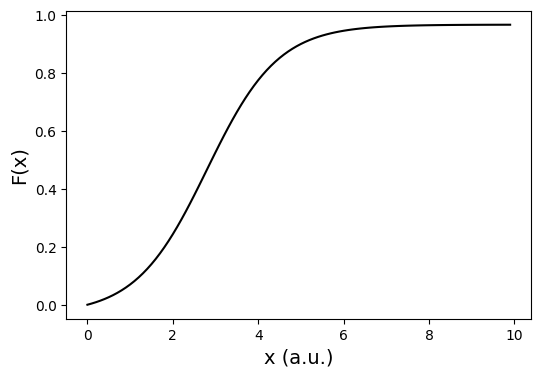

In [5]:
pars = default_pars_single()  # get default parameters
x = np.arange(0, 10, .1)      # set the range of input

# Compute transfer function
f = F(x, pars['a'], pars['theta'])

# Visualize
plot_fI(x, f)

In [6]:
@widgets.interact(
    a=widgets.FloatSlider(1.5, min=0.3, max=3., step=0.3),
    theta=widgets.FloatSlider(3., min=2., max=4., step=0.2)
)


def interactive_plot_FI(a, theta):
    """
    Population activation function.
  
    Expecxts:
      a     : the gain of the function
      theta : the threshold of the function
  
    Returns:
      plot the F-I curve with give parameters
    """

    # set the range of input
    x = np.arange(0, 10, .1)
    plt.figure()
    plt.plot(x, F(x, a, theta), 'k')
    plt.xlabel('x (a.u.)', fontsize=14)
    plt.ylabel('F(x)', fontsize=14)
    plt.show()

interactive(children=(FloatSlider(value=1.5, description='a', max=3.0, min=0.3, step=0.3), FloatSlider(value=3…

In [7]:
pars = default_pars_single(T=20.)

@widgets.interact(
    I_ext=widgets.FloatSlider(5.0, min=0.0, max=10., step=1.),
    tau=widgets.FloatSlider(3., min=1., max=5., step=0.2)
)


def Myplot_E_diffI_difftau(I_ext, tau):
    # set external input and time constant
    pars['I_ext'] = I_ext
    pars['tau'] = tau

    # simulation
    r = simulate_single(pars)

    # Analytical Solution
    r_ana = (pars['r_init']
             + (F(I_ext, pars['a'], pars['theta'])
                - pars['r_init']) * (1. - np.exp(-pars['range_t'] / pars['tau'])))

    # plot
    plt.figure()
    plt.plot(pars['range_t'], r, 'b', label=r'$r_{\mathrm{sim}}$(t)', alpha=0.5,
             zorder=1)
    plt.plot(pars['range_t'], r_ana, 'b--', lw=5, dashes=(2, 2),
             label=r'$r_{\mathrm{ana}}$(t)', zorder=2)
    plt.plot(pars['range_t'],
             F(I_ext, pars['a'], pars['theta']) * np.ones(pars['range_t'].size),
             'k--', label=r'$F(I_{\mathrm{ext}})$')
    plt.xlabel('t (ms)', fontsize=16.)
    plt.ylabel('Activity r(t)', fontsize=16.)
    plt.legend(loc='best', fontsize=14.)
    plt.show()

interactive(children=(FloatSlider(value=5.0, description='I_ext', max=10.0, step=1.0), FloatSlider(value=3.0, …

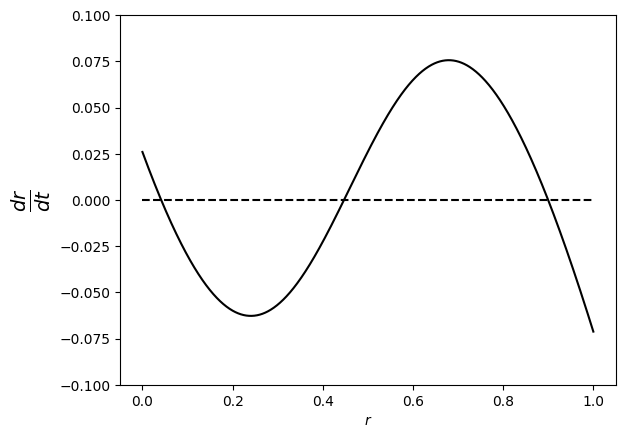

In [8]:
def compute_drdt(r, I_ext, w, a, theta, tau, **other_pars):
    """Given parameters, compute dr/dt as a function of r.
  
    Args:
      r (1D array) : Average firing rate of the excitatory population
      I_ext, w, a, theta, tau (numbers): Simulation parameters to use
      other_pars : Other simulation parameters are unused by this function
  
    Returns
      drdt function for each value of r
    """
    # Calculate drdt
    drdt = 1 / tau * (-r + F(w * r + I_ext, a, theta)) 

    return drdt


# Define a vector of r values and the simulation parameters
r = np.linspace(0, 1, 1000)
pars = default_pars_single(I_ext=0.5, w=5)

# Compute dr/dt
drdt = compute_drdt(r, **pars)

# Visualize
plot_dr_r(r, drdt)

In [9]:
def my_fp_single(r_guess, a, theta, w, I_ext, **other_pars):
    """
    Calculate the fixed point through drE/dt=0
  
    Args:
      r_guess  : Initial value used for scipy.optimize function
      a, theta, w, I_ext : simulation parameters
  
    Returns:
      x_fp    : value of fixed point
    """
    # define the right hand of E dynamics
    def my_WCr(x):
        r = x
        drdt = (-r + F(w * r + I_ext, a, theta))
        y = np.array(drdt)

        return y

    x0 = np.array(r_guess)
    x_fp = opt.root(my_WCr, x0).x.item()

    return x_fp


def check_fp_single(x_fp, a, theta, w, I_ext, mytol=1e-4, **other_pars):
    """
     Verify |dr/dt| < mytol
  
    Args:
      fp      : value of fixed point
      a, theta, w, I_ext: simulation parameters
      mytol   : tolerance, default as 10^{-4}
  
    Returns :
      Whether it is a correct fixed point: True/False
    """
    # calculate Equation(3)
    y = x_fp - F(w * x_fp + I_ext, a, theta)

    # Here we set tolerance as 10^{-4}
    return np.abs(y) < mytol


def my_fp_finder(pars, r_guess_vector, mytol=1e-4):
    """
    Calculate the fixed point(s) through drE/dt=0
  
    Args:
      pars    : Parameter dictionary
      r_guess_vector  : Initial values used for scipy.optimize function
      mytol   : tolerance for checking fixed point, default as 10^{-4}
  
    Returns:
      x_fps   : values of fixed points
  
    """
    x_fps = []
    correct_fps = []
    for r_guess in r_guess_vector:
        x_fp = my_fp_single(r_guess, **pars)
        if check_fp_single(x_fp, **pars, mytol=mytol):
            x_fps.append(x_fp)

    return x_fps


help(my_fp_finder)

Help on function my_fp_finder in module __main__:

my_fp_finder(pars, r_guess_vector, mytol=0.0001)
    Calculate the fixed point(s) through drE/dt=0
    
    Args:
      pars    : Parameter dictionary
      r_guess_vector  : Initial values used for scipy.optimize function
      mytol   : tolerance for checking fixed point, default as 10^{-4}
    
    Returns:
      x_fps   : values of fixed points


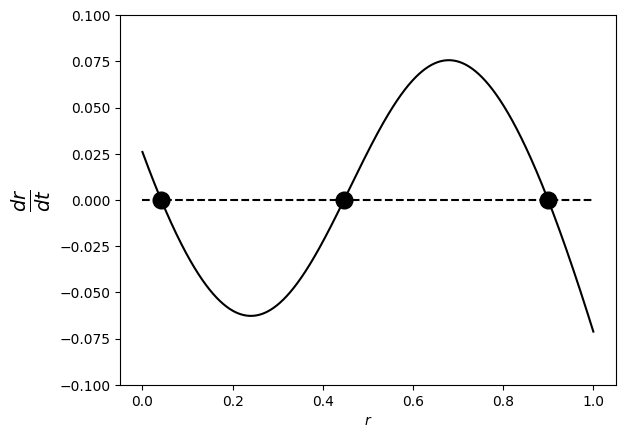

In [10]:
# Set parameters
r = np.linspace(0, 1, 1000)
pars = default_pars_single(I_ext=0.5, w=5)

# Compute dr/dt
drdt = compute_drdt(r, **pars)

# Initial guesses for fixed points
r_guess_vector = [0.0, 0.4, 0.8]

# Find fixed point numerically
x_fps = my_fp_finder(pars, r_guess_vector)

# Visualize
plot_dr_r(r, drdt, x_fps)

In [11]:
@widgets.interact(
    w=widgets.FloatSlider(4., min=1., max=7., step=0.2),
    I_ext=widgets.FloatSlider(1.5, min=0., max=3., step=0.1)
)


def plot_intersection_single(w, I_ext):
    # set your parameters
    pars = default_pars_single(w=w, I_ext=I_ext)

    # find fixed points
    r_init_vector = [0, .4, .9]
    x_fps = my_fp_finder(pars, r_init_vector)

    # plot
    r = np.linspace(0, 1., 1000)
    drdt = (-r + F(w * r + I_ext, pars['a'], pars['theta'])) / pars['tau']

    plot_dr_r(r, drdt, x_fps)

interactive(children=(FloatSlider(value=4.0, description='w', max=7.0, min=1.0, step=0.2), FloatSlider(value=1…

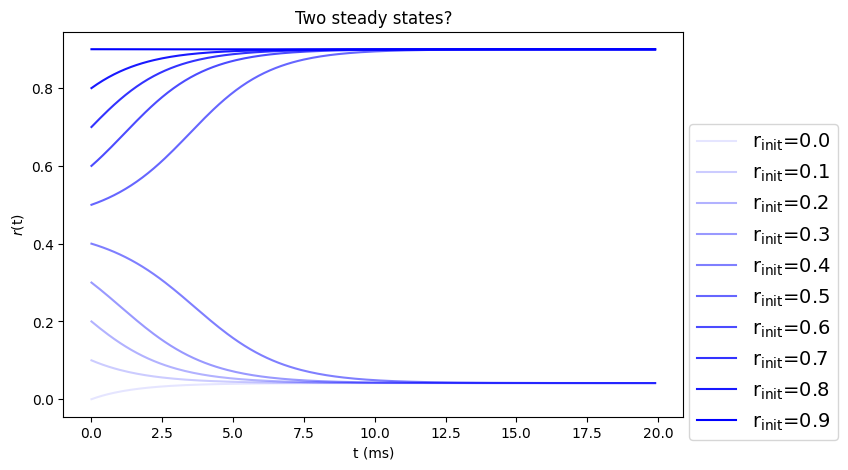

In [15]:
pars = default_pars_single()
pars['w'] = 5.0
pars['I_ext'] = 0.5

plt.figure(figsize=(8, 5))
for ie in range(10):
    pars['r_init'] = 0.1 * ie  # set the initial value
    r = simulate_single(pars)  # run the simulation

    # plot the activity with given initial
    plt.plot(pars['range_t'], r, 'b', alpha=0.1 + 0.1 * ie,
             label=r'r$_{\mathrm{init}}$=%.1f' % (0.1 * ie))

plt.xlabel('t (ms)')
plt.title('Two steady states?')
plt.ylabel(r'$r$(t)')
plt.legend(loc=[1.01, -0.06], fontsize=14)
plt.show()

In [16]:
r_guess_vector = [0, .4, .9]

# Find fixed point numerically
x_fps = my_fp_finder(pars, r_guess_vector)

print(f'Our fixed points are {x_fps}')

Our fixed points are [0.04153669901331739, 0.4471192240898344, 0.8997171538560865]


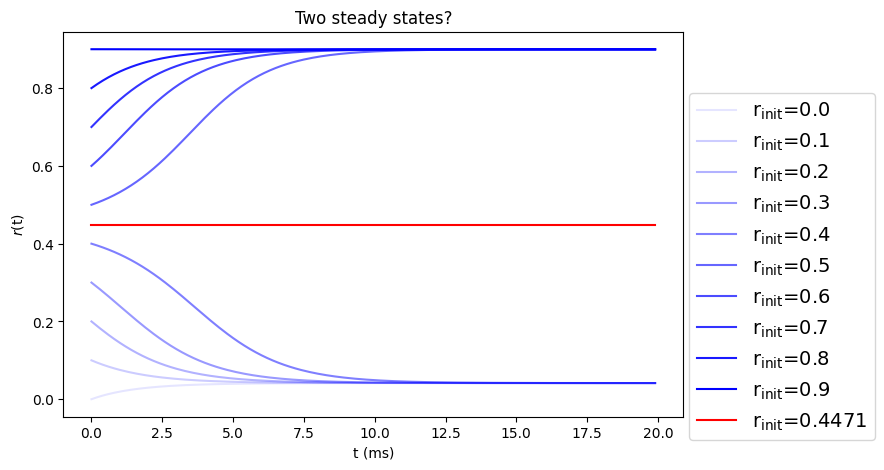

In [17]:
pars = default_pars_single()
pars['w'] = 5.0
pars['I_ext'] = 0.5

plt.figure(figsize=(8, 5))
for ie in range(10):
    pars['r_init'] = 0.1 * ie  # set the initial value
    r = simulate_single(pars)  # run the simulation

    # plot the activity with given initial
    plt.plot(pars['range_t'], r, 'b', alpha=0.1 + 0.1 * ie,
             label=r'r$_{\mathrm{init}}$=%.1f' % (0.1 * ie))

pars['r_init'] = x_fps[1]  # set the initial value
r = simulate_single(pars)  # run the simulation

# plot the activity with given initial
plt.plot(pars['range_t'], r, 'r', alpha=0.1 + 0.1 * ie,
         label=r'r$_{\mathrm{init}}$=%.4f' % (x_fps[1]))

plt.xlabel('t (ms)')
plt.title('Two steady states?')
plt.ylabel(r'$r$(t)')
plt.legend(loc=[1.01, -0.06], fontsize=14)
plt.show()

## Tutorial 2: Wilson-Cowan Model

In [21]:
def plot_FI_inverse(x, a, theta):
    f, ax = plt.subplots()
    ax.plot(x, F_inv(x, a=a, theta=theta))
    ax.set(xlabel="$x$", ylabel="$F^{-1}(x)$")


def plot_FI_EI(x, FI_exc, FI_inh):
    plt.figure()
    plt.plot(x, FI_exc, 'b', label='E population')
    plt.plot(x, FI_inh, 'r', label='I population')
    plt.legend(loc='lower right')
    plt.xlabel('x (a.u.)')
    plt.ylabel('F(x)')
    plt.show()


def my_test_plot(t, rE1, rI1, rE2, rI2):

    plt.figure()
    ax1 = plt.subplot(211)
    ax1.plot(pars['range_t'], rE1, 'b', label='E population')
    ax1.plot(pars['range_t'], rI1, 'r', label='I population')
    ax1.set_ylabel('Activity')
    ax1.legend(loc='best')

    ax2 = plt.subplot(212, sharex=ax1, sharey=ax1)
    ax2.plot(pars['range_t'], rE2, 'b', label='E population')
    ax2.plot(pars['range_t'], rI2, 'r', label='I population')
    ax2.set_xlabel('t (ms)')
    ax2.set_ylabel('Activity')
    ax2.legend(loc='best')

    plt.tight_layout()
    plt.show()


def plot_nullclines(Exc_null_rE, Exc_null_rI, Inh_null_rE, Inh_null_rI):

    plt.figure()
    plt.plot(Exc_null_rE, Exc_null_rI, 'b', label='E nullcline')
    plt.plot(Inh_null_rE, Inh_null_rI, 'r', label='I nullcline')
    plt.xlabel(r'$r_E$')
    plt.ylabel(r'$r_I$')
    plt.legend(loc='best')
    plt.show()


def my_plot_nullcline(pars):
    Exc_null_rE = np.linspace(-0.01, 0.96, 100)
    Exc_null_rI = get_E_nullcline(Exc_null_rE, **pars)
    Inh_null_rI = np.linspace(-.01, 0.8, 100)
    Inh_null_rE = get_I_nullcline(Inh_null_rI, **pars)

    plt.plot(Exc_null_rE, Exc_null_rI, 'b', label='E nullcline')
    plt.plot(Inh_null_rE, Inh_null_rI, 'r', label='I nullcline')
    plt.xlabel(r'$r_E$')
    plt.ylabel(r'$r_I$')
    plt.legend(loc='best')


def my_plot_vector(pars, my_n_skip=2, myscale=5):
    EI_grid = np.linspace(0., 1., 20)
    rE, rI = np.meshgrid(EI_grid, EI_grid)
    drEdt, drIdt = EIderivs(rE, rI, **pars)

    n_skip = my_n_skip

    plt.quiver(rE[::n_skip, ::n_skip], rI[::n_skip, ::n_skip],
               drEdt[::n_skip, ::n_skip], drIdt[::n_skip, ::n_skip],
               angles='xy', scale_units='xy', scale=myscale, facecolor='c')

    plt.xlabel(r'$r_E$')
    plt.ylabel(r'$r_I$')


def my_plot_trajectory(pars, mycolor, x_init, mylabel):
    pars = pars.copy()
    pars['rE_init'], pars['rI_init'] = x_init[0], x_init[1]
    rE_tj, rI_tj = simulate_wc(**pars)

    plt.plot(rE_tj, rI_tj, color=mycolor, label=mylabel)
    plt.plot(x_init[0], x_init[1], 'o', color=mycolor, ms=8)
    plt.xlabel(r'$r_E$')
    plt.ylabel(r'$r_I$')


def my_plot_trajectories(pars, dx, n, mylabel):
    """
    Solve for I along the E_grid from dE/dt = 0.
  
    Expects:
    pars    : Parameter dictionary
    dx      : increment of initial values
    n       : n*n trjectories
    mylabel : label for legend
  
    Returns:
      figure of trajectory
    """
    pars = pars.copy()
    for ie in range(n):
        for ii in range(n):
            pars['rE_init'], pars['rI_init'] = dx * ie, dx * ii
            rE_tj, rI_tj = simulate_wc(**pars)
            if (ie == n-1) & (ii == n-1):
                plt.plot(rE_tj, rI_tj, 'gray', alpha=0.8, label=mylabel)
            else:
                plt.plot(rE_tj, rI_tj, 'gray', alpha=0.8)

    plt.xlabel(r'$r_E$')
    plt.ylabel(r'$r_I$')


def plot_complete_analysis(pars):
    plt.figure(figsize=(7.7, 6.))

    # plot example trajectories
    my_plot_trajectories(pars, 0.2, 6,
                         'Sample trajectories \nfor different init. conditions')
    my_plot_trajectory(pars, 'orange', [0.6, 0.8],
                       'Sample trajectory for \nlow activity')
    my_plot_trajectory(pars, 'm', [0.6, 0.6],
                       'Sample trajectory for \nhigh activity')

    # plot nullclines
    my_plot_nullcline(pars)

    # plot vector field
    EI_grid = np.linspace(0., 1., 20)
    rE, rI = np.meshgrid(EI_grid, EI_grid)
    drEdt, drIdt = EIderivs(rE, rI, **pars)
    n_skip = 2
    plt.quiver(rE[::n_skip, ::n_skip], rI[::n_skip, ::n_skip],
               drEdt[::n_skip, ::n_skip], drIdt[::n_skip, ::n_skip],
               angles='xy', scale_units='xy', scale=5., facecolor='c')

    plt.legend(loc=[1.02, 0.57], handlelength=1)
    plt.show()


def plot_fp(x_fp, position=(0.02, 0.1), rotation=0):
    plt.plot(x_fp[0], x_fp[1], 'ko', ms=8)
    plt.text(x_fp[0] + position[0], x_fp[1] + position[1],
             f'Fixed Point1=\n({x_fp[0]:.3f}, {x_fp[1]:.3f})',
             horizontalalignment='center', verticalalignment='bottom',
             rotation=rotation)

In [22]:
def default_pars(**kwargs):
    pars = {}

    # Excitatory parameters
    pars['tau_E'] = 1.     # Timescale of the E population [ms]
    pars['a_E'] = 1.2      # Gain of the E population
    pars['theta_E'] = 2.8  # Threshold of the E population

    # Inhibitory parameters
    pars['tau_I'] = 2.0    # Timescale of the I population [ms]
    pars['a_I'] = 1.0      # Gain of the I population
    pars['theta_I'] = 4.0  # Threshold of the I population

    # Connection strength
    pars['wEE'] = 9.   # E to E
    pars['wEI'] = 4.   # I to E
    pars['wIE'] = 13.  # E to I
    pars['wII'] = 11.  # I to I

    # External input
    pars['I_ext_E'] = 0.
    pars['I_ext_I'] = 0.

    # simulation parameters
    pars['T'] = 50.        # Total duration of simulation [ms]
    pars['dt'] = .1        # Simulation time step [ms]
    pars['rE_init'] = 0.2  # Initial value of E
    pars['rI_init'] = 0.2  # Initial value of I

    # External parameters if any
    for k in kwargs:
        pars[k] = kwargs[k]

    # Vector of discretized time points [ms]
    pars['range_t'] = np.arange(0, pars['T'], pars['dt'])

    return pars


def F(x, a, theta):
    """
    Population activation function, F-I curve
  
    Args:
      x     : the population input
      a     : the gain of the function
      theta : the threshold of the function
  
    Returns:
      f     : the population activation response f(x) for input x
    """

    # add the expression of f = F(x)
    f = (1 + np.exp(-a * (x - theta)))**-1 - (1 + np.exp(a * theta))**-1

    return f


def dF(x, a, theta):
    """
    Derivative of the population activation function.
  
    Args:
      x     : the population input
      a     : the gain of the function
      theta : the threshold of the function
  
    Returns:
      dFdx  :  Derivative of the population activation function.
    """

    dFdx = a * np.exp(-a * (x - theta)) * (1 + np.exp(-a * (x - theta)))**-2

    return dFdx

1.2 2.8
1.0 4.0


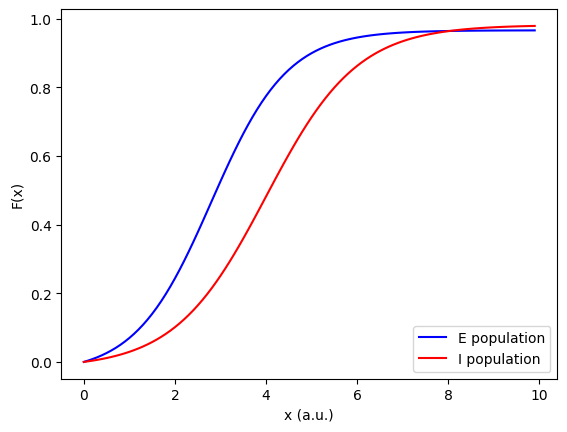

In [24]:
pars = default_pars()
x = np.arange(0, 10, .1)

print(pars['a_E'], pars['theta_E'])
print(pars['a_I'], pars['theta_I'])

# Compute the F-I curve of the excitatory population
FI_exc = F(x, pars['a_E'], pars['theta_E']) 

# Compute the F-I curve of the inhibitory population
FI_inh = F(x, pars['a_I'], pars['theta_I'])

# Visualize
plot_FI_EI(x, FI_exc, FI_inh)

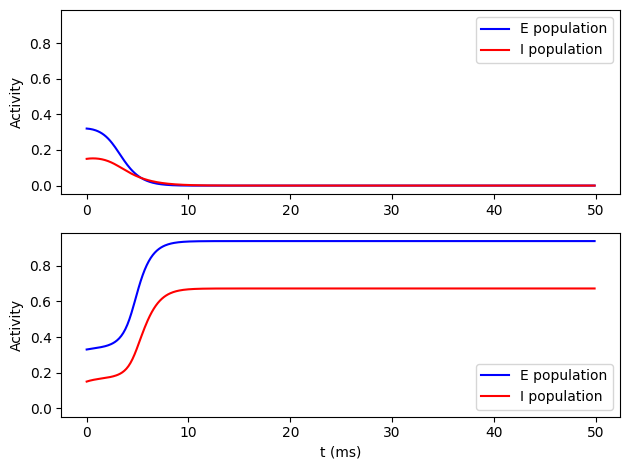

In [33]:
def simulate_wc(tau_E, a_E, theta_E, tau_I, a_I, theta_I,
                wEE, wEI, wIE, wII, I_ext_E, I_ext_I,
                rE_init, rI_init, dt, range_t, **other_pars):
    """
    Simulate the Wilson-Cowan equations
  
    Args:
      Parameters of the Wilson-Cowan model
  
    Returns:
      rE, rI (arrays) : Activity of excitatory and inhibitory populations
    """
    # Initialize activity arrays
    Lt = range_t.size
    rE = np.append(rE_init, np.zeros(Lt - 1))
    rI = np.append(rI_init, np.zeros(Lt - 1))
    I_ext_E = I_ext_E * np.ones(Lt)
    I_ext_I = I_ext_I * np.ones(Lt)

    # Simulate the Wilson-Cowan equations
    for k in range(Lt - 1):

        # Calculate the derivative of the E population
        drE = (dt / tau_E) * (-rE[k] + F(wEE * rE[k] - wEI * rI[k] + I_ext_E[k], a_E, theta_E))

        # Calculate the derivative of the I population
        drI = (dt / tau_I) * (-rI[k] + F(-1 * wII * rI[k] + wIE * rE[k] + I_ext_I[k], a_I, theta_I))

        # Update using Euler's method
        rE[k + 1] = rE[k] + drE
        rI[k + 1] = rI[k] + drI

    return rE, rI


pars = default_pars()

# Simulate first trajectory
rE1, rI1 = simulate_wc(**default_pars(rE_init=.32, rI_init=.15))

# Simulate second trajectory
rE2, rI2 = simulate_wc(**default_pars(rE_init=.33, rI_init=.15))

# Visualize
my_test_plot(pars['range_t'], rE1, rI1, rE2, rI2)

In [34]:
@widgets.interact(
    rE_init=widgets.FloatSlider(0.32, min=0.30, max=0.35, step=.01)
)


def plot_EI_diffinitial(rE_init=0.0):

    pars = default_pars(rE_init=rE_init, rI_init=.15)
    rE, rI = simulate_wc(**pars)

    plt.figure()
    plt.plot(pars['range_t'], rE, 'b', label='E population')
    plt.plot(pars['range_t'], rI, 'r', label='I population')
    plt.xlabel('t (ms)')
    plt.ylabel('Activity')
    plt.legend(loc='best')
    plt.show()

interactive(children=(FloatSlider(value=0.32, description='rE_init', max=0.35, min=0.3, step=0.01), Output()),…

In [35]:
pars = default_pars(T=10, rE_init=0.6, rI_init=0.8)
rE, rI = simulate_wc(**pars)

@widgets.interact(
    n_t=widgets.IntSlider(0, min=0, max=len(pars['range_t']) - 1, step=1)
)


def plot_activity_phase(n_t):
    plt.figure(figsize=(8, 5.5))
    plt.subplot(211)
    plt.plot(pars['range_t'], rE, 'b', label=r'$r_E$')
    plt.plot(pars['range_t'], rI, 'r', label=r'$r_I$')
    plt.plot(pars['range_t'][n_t], rE[n_t], 'bo')
    plt.plot(pars['range_t'][n_t], rI[n_t], 'ro')
    plt.axvline(pars['range_t'][n_t], 0, 1, color='k', ls='--')
    plt.xlabel('t (ms)', fontsize=14)
    plt.ylabel('Activity', fontsize=14)
    plt.legend(loc='best', fontsize=14)

    plt.subplot(212)
    plt.plot(rE, rI, 'k')
    plt.plot(rE[n_t], rI[n_t], 'ko')
    plt.xlabel(r'$r_E$', fontsize=18, color='b')
    plt.ylabel(r'$r_I$', fontsize=18, color='r')

    plt.tight_layout()
    plt.show()

interactive(children=(IntSlider(value=0, description='n_t', max=99), Output()), _dom_classes=('widget-interact…

/var/folders/cq/mgwyqn7d59ngb2f13sxdkkxc0000gn/T/ipykernel_70092/2811028266.py:13: RuntimeWarning: invalid value encountered in log
  F_inverse = theta + -1/a * np.log(-1 + 1/(x + (1 / (1 + np.exp(a * theta)))))


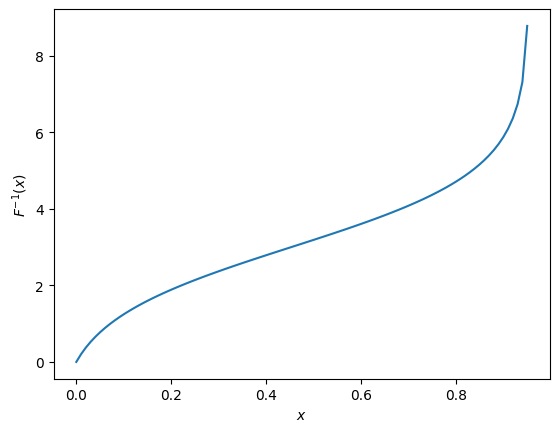

In [37]:
def F_inv(x, a, theta):
    """
    Args:
      x         : the population input
      a         : the gain of the function
      theta     : the threshold of the function
  
    Returns:
      F_inverse : value of the inverse function
    """

    # Calculate Finverse (ln(x) can be calculated as np.log(x))
    F_inverse = theta + -1/a * np.log(-1 + 1/(x + (1 / (1 + np.exp(a * theta))))) 

    return F_inverse


# Set parameters
pars = default_pars()
x = np.linspace(1e-6, 1, 100)

# Get inverse and visualize
plot_FI_inverse(x, a=1, theta=3)

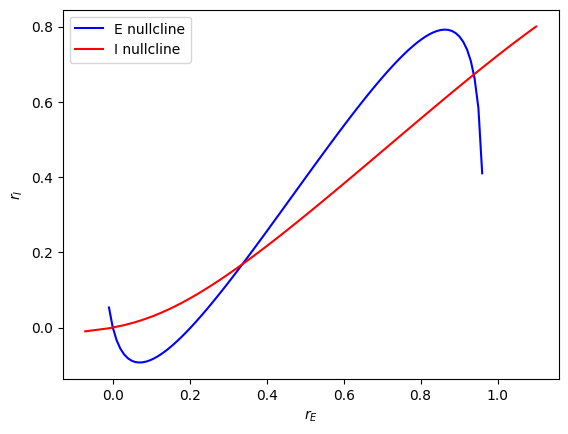

In [38]:
def get_E_nullcline(rE, a_E, theta_E, wEE, wEI, I_ext_E, **other_pars):
    """
    Solve for rI along the rE from drE/dt = 0.
  
    Args:
      rE    : response of excitatory population
      a_E, theta_E, wEE, wEI, I_ext_E : Wilson-Cowan excitatory parameters
      Other parameters are ignored
  
    Returns:
      rI    : values of inhibitory population along the nullcline on the rE
    """

    # calculate rI for E nullclines on rI
    rI = 1/wEI * (wEE * rE - F_inv(rE, a_E, theta_E) + I_ext_E)

    return rI


def get_I_nullcline(rI, a_I, theta_I, wIE, wII, I_ext_I, **other_pars):
    """
    Solve for E along the rI from dI/dt = 0.
  
    Args:
      rI    : response of inhibitory population
      a_I, theta_I, wIE, wII, I_ext_I : Wilson-Cowan inhibitory parameters
      Other parameters are ignored
  
    Returns:
      rE    : values of the excitatory population along the nullcline on the rI
    """

    # calculate rE for I nullclines on rI
    rE = 1/wIE * (wII * rI + F_inv(rI, a_I, theta_I) + I_ext_I)

    return rE


# Set parameters
pars = default_pars()
Exc_null_rE = np.linspace(-0.01, 0.96, 100)
Inh_null_rI = np.linspace(-.01, 0.8, 100)

# Compute nullclines
Exc_null_rI = get_E_nullcline(Exc_null_rE, **pars)
Inh_null_rE = get_I_nullcline(Inh_null_rI, **pars)

# Visualize
plot_nullclines(Exc_null_rE, Exc_null_rI, Inh_null_rE, Inh_null_rI)

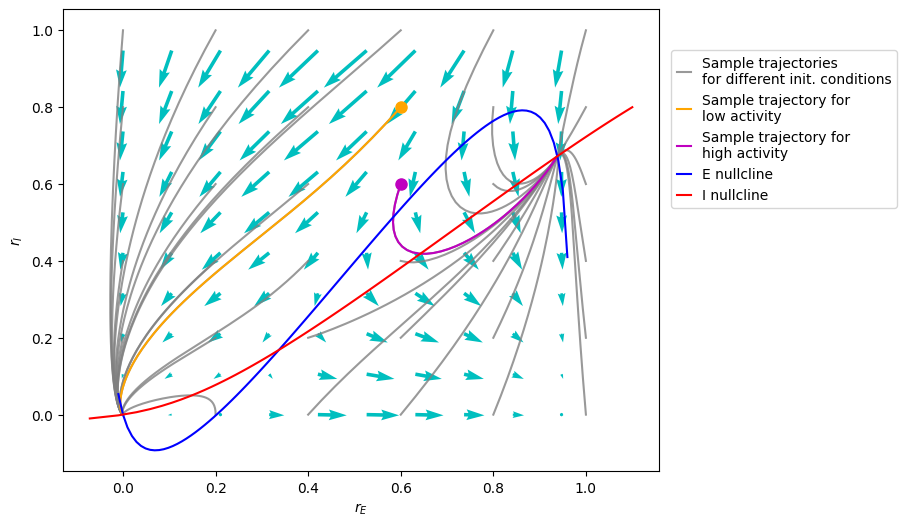

In [40]:
def EIderivs(rE, rI,
             tau_E, a_E, theta_E, wEE, wEI, I_ext_E,
             tau_I, a_I, theta_I, wIE, wII, I_ext_I,
             **other_pars):
    """Time derivatives for E/I variables (dE/dt, dI/dt)."""

    # Compute the derivative of rE
    drEdt = 1 / tau_E * (-rE + F(wEE * rE - wEI * rI + I_ext_E, a_E, theta_E))

    # Compute the derivative of rI
    drIdt = 1 / tau_I * (-rI + F(-wII * rI - wIE * rE + I_ext_I, a_I, theta_I))

    return drEdt, drIdt


# Create vector field using EIderivs
plot_complete_analysis(default_pars())

In [63]:
import pandas as pd
dict = {
    'career_growth': [1, -1, 1, 0],
    'well_being': [-3, 3, 3, -1],
    'skill_development': [2, 3, 2, 0],
    'life_logistics': [2, -2, 0, -1],
    'effort_required': [0, -3, -2, -1],
    'social_cost': [1, 0, -1, -2],
    'money': [0, -1, 0, 0],
}
weights = {
    'career_growth': 0.5,
    'well_being': 1,
    'skill_development': 0.3,
    'life_logistics': 0.8,
    'effort_required': 0.5,
    'social_cost': 0.5,
    'money': 0.6, 
}

df = pd.DataFrame(dict).values
weights = np.asarray(list(weights.values()))
print(weights.shape, df.shape)

print(df @ weights)


(7,) (4, 7)
[ 1.   0.9  3.4 -3.3]
